# **Business Problem**
"Predict behavior to retain customers. You can analyze all relevant customer cd and develop focused customer retention programs."

**Content**
There are 7043 rows where each row represents a unique costumer, while the 21 columns with 19 feature containing information about customer’s services, account and demographic cd.

The cd set includes information about:

*(1) Demographic Information*

gender: Whether the customer is a female or a male (Female, Male)

---


SeniorCitizen: Whether the customer is a senior citizen or not (0, 1)

---


Partner: Whether the customer has a partner or not (Yes, No)

---


Dependents: Whether the customer has dependents or not (Yes, No)

---



*(2) Customer Account Information*

tenure: Number of months the customer has stayed with the company(Multiple different numeric values)

---


Contract: Indicates the customer’s current contract type (Month-to-Month, One year, Two year)

---


PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)

---


PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit - Card (automatic))

---


MontlyCharges: The amount charged to the customer monthly (Multiple different numeric values)

---


TotalCharges: The total amount charged to the customer (Multiple different numeric values)

---



*(3) Service Information*

PhoneService: Whether the customer has a phone service or not (Yes, No)

---


MultipleLines: Whether the customer has multiple lines or not (No phone service, No, Yes)
InternetServices: Whether the customer is subscribed to Internet service with the company (DSL, Fiber optic, No)

---


OnlineSecurity: Whether the customer has online security or not (No internet service, No, Yes)

---


OnlineBackup: Whether the customer has online backup or not (No internet service, No, Yes)

---


DeviceProtection: Whether the customer has device protection or not (No internet service, No, Yes)

---


TechSupport: Whether the customer has tech support or not (No internet service, No, Yes)

---


StreamingTV: Whether the customer has streaming TV or not (No internet service, No, Yes)

---


StreamingMovies: Whether the customer has streaming movies or not (No internet service, No, Yes)




#**Importing all the needed libraries/ packages**

In [2]:
import numpy as np # linear algebra
import pandas as pd# cd processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # cd visualization
import matplotlib.pyplot as plt # cd Visualization 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

# 1.  **Load cd**

In [3]:
cd=pd.read_csv(r'/content/drive/MyDrive/Churn.csv')

## **Checking out the cd** 

In [4]:
cd.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
cd.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
print("cdset shape  : ",cd.shape)

dataset shape  :  (7043, 21)


In [7]:
print(cd.info()) #checking columns,total records, cd type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 2. Cleaning

## TotalCharges

In [10]:
cd[cd['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
cd['TotalCharges']=cd['TotalCharges'].str.strip()
cd['TotalCharges']=cd['TotalCharges'].replace('',np.nan)

cd['TotalCharges']=cd['TotalCharges'].astype(float)


In [13]:
cd['TotalCharges']=cd['TotalCharges'].fillna(cd['TotalCharges'].median())

In [14]:
numerical=list(cd.select_dtypes(include=['number']).columns)
categorical=list(cd.select_dtypes(include=['object']).columns)

In [15]:
cd.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# 3. New Features

## tenureclass

In [16]:
def newclass(x):
    if x>1 and x<=6:
        x=1
    elif x>6 and x<=12:
        x=2
    elif x>12 and x<=18:
        x=3
    elif x>18 and x<=24:
        x=4
    elif x>24 and x<=30:
        x=5
    elif x>30 and x<=36:
        x=6
    elif x>36 and x<=42:
        x=7
    elif x>42 and x<=48:
        x=7
    elif x>48 and x<=54:
        x=8
    elif x>54 and x<=60:
        x=9
    elif x>60 and x<=66:
        x=10
    elif x>66 and x<=72:
        x=11
    elif x > 72 and x <= 78:
        x = 11
    return x

cd['tenureclass'] = cd["tenure"].apply(lambda x: newclass(x))

## FamilyPackages

In [17]:
def family(a,b):
    if (a=='Yes' and b=='Yes') or(a=='No' and b=='Yes'):
        return 'Family'
    elif (a=='Yes' and b=='No'):
        return 'Couple'
    elif (a=='No' and b=='No'):
        return 'Single'


cd['FamilyComposition'] = cd.apply(lambda x: family(x.Partner, x.Dependents), axis=1)

# 4.Feature Selection

# **Exploratory cd Analysis**


In [22]:
cd=cd.drop('customerID',axis=1)

In [24]:
numerical=list(cd.select_dtypes(include=['number']).columns)
categorical=list(cd.select_dtypes(include=['object']).columns)

Target variable

We are trying to predict if the client left the company in the previous month.

Therefore we have a binary classification problem with a slightly unbalanced target:

Churn: No - 72.4%

Churn: Yes - 27.6%

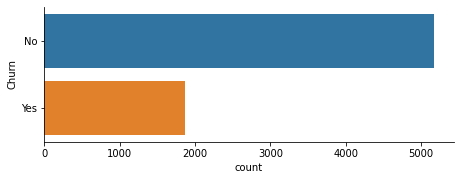

In [27]:
ax = sns.catplot(y="Churn", kind="count", data=cd, height=2.6, aspect=2.5, orient='h')

There is clearly a class imbalance which will affect predictions later. This will be addressed in Preprocessing.

In [25]:
#Numerical features
numerical 

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'tenureclass']

The probability density distribution of numerical features can be estimate using the seaborn kdeplot function.

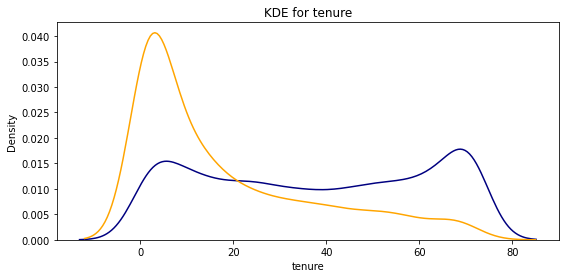

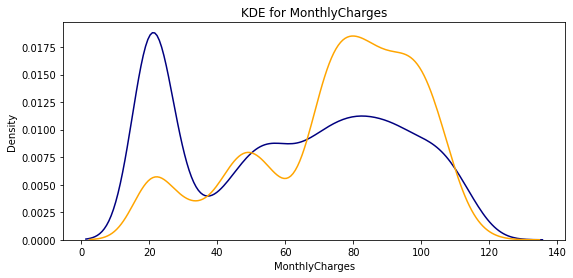

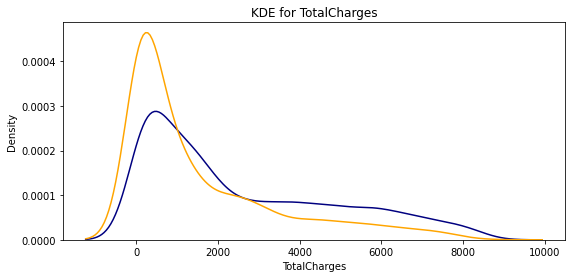

In [28]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(cd[cd['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(cd[cd['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
kdeplot('tenure')
kdeplot('MonthlyCharges')
kdeplot('TotalCharges')

From the plots above we can conclude that:

1. Recent clients are more likely to churn
2. Clients with higher MonthlyCharges are also more likely to churn
3. Tenure and MonthlyCharges are probably important features

In [26]:
#Categorical features
categorical

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'FamilyComposition']

Lets plot some graphs 


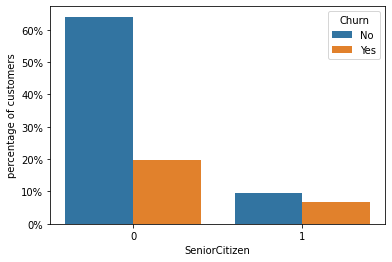

In [29]:
# SeniorCetizen vs Churn 
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = cd.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(cd)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")


<AxesSubplot:xlabel='gender', ylabel='count'>

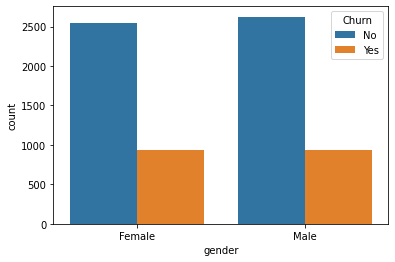

In [ ]:
# Gender v/s Churn
sns.countplot(x=cd['gender'],hue=cd['Churn'])

In [30]:
likelihood = cd[cd['Churn']=='Yes'].groupby('gender').apply(len)/cd.groupby('gender').apply(len)
likelihood

gender
Female    0.269209
Male      0.261603
dtype: float64

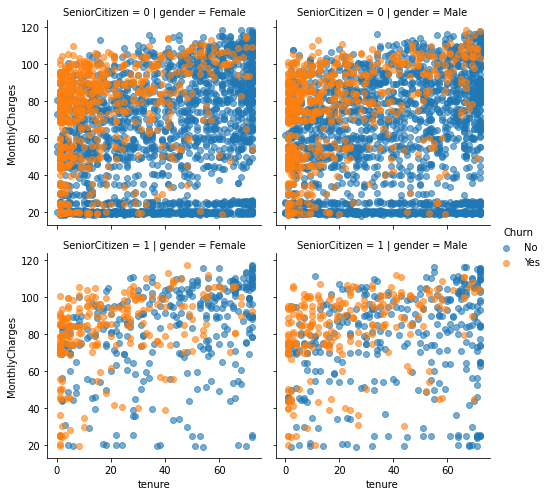

In [32]:
g = sns.FacetGrid(cd, row='SeniorCitizen', col="gender", hue="Churn", height=3.5)
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend();

1. Gender is not an indicative of churn.
2. SeniorCitizens are only 16% of customers, but they have a much higher churn rate: 42% against 23% for non-senior customers.
3. There are no special relations between this categorical values and the main numerical features.

In [ ]:
for feature in categorical:  
    print('\n')
    print('There is Churn')
    likelihood = cd[cd['Churn']=='Yes'].groupby(feature).apply(len)/cd.groupby(feature).apply(len)
    print(likelihood)
    
    
    likelihood1 = cd[cd['Churn']=='No'].groupby(feature).apply(len)/cd.groupby(feature).apply(len)
    print('\n')
    print('There is not Churn')
    print(likelihood1)



There is Churn
gender
Female    0.269209
Male      0.261603
dtype: float64


There is not Churn
gender
Female    0.730791
Male      0.738397
dtype: float64


There is Churn
Partner
No     0.329580
Yes    0.196649
dtype: float64


There is not Churn
Partner
No     0.670420
Yes    0.803351
dtype: float64


There is Churn
Dependents
No     0.312791
Yes    0.154502
dtype: float64


There is not Churn
Dependents
No     0.687209
Yes    0.845498
dtype: float64


There is Churn
PhoneService
No     0.249267
Yes    0.267096
dtype: float64


There is not Churn
PhoneService
No     0.750733
Yes    0.732904
dtype: float64


There is Churn
MultipleLines
No                  0.250442
No phone service    0.249267
Yes                 0.286099
dtype: float64


There is not Churn
MultipleLines
No                  0.749558
No phone service    0.750733
Yes                 0.713901
dtype: float64


There is Churn
InternetService
DSL            0.189591
Fiber optic    0.418928
No             0.074050
dtype: 

* If we look at the probabilities of these categoircal columns we can see how they affect the churn of customers  and draw some conclusions such as :  
* Customers that doesn't have partners are more likely to churn.
* Customers without dependents are also more likely to churn.
* Customers with multiple lines have a slightly higher churn rate.
* Clients without internet have a very low churn rate.
* Customers with paperless billing are more probable to churn
* The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate
* Short term contracts have higher churn rates
* Customers with fiber are more probable to churn than those with DSL connection
* We can see that the categorical values all show clear effects on customer behaviour.



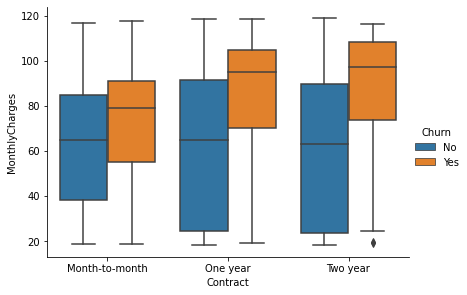

In [33]:
# Contract vs MontlyCharges
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=cd, height=4.2, aspect=1.4)

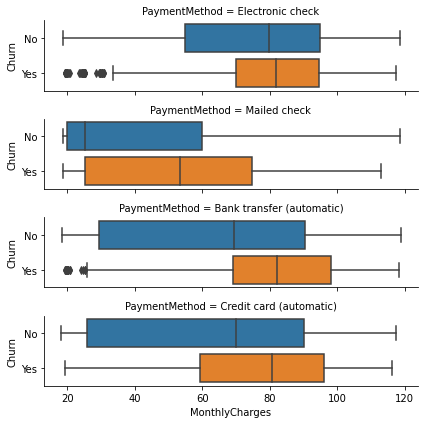

In [34]:
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=cd, height=1.5, aspect=4, orient='h')


1. Longer contracts are more affected by higher monthly charges (for churn rate).
2. Mailed checks have lower charges
3. There is a huge gap in charges between customers that churn and those that don't with respect to Mailed Check

In [35]:
# Correlation between features
corr = cd.corr()
corr

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,tenureclass
SeniorCitizen,1.000000,0.016567,0.220173,0.102652,0.017574
tenure,0.016567,1.000000,0.247900,0.825464,0.995891
MonthlyCharges,0.220173,0.247900,1.000000,0.650864,0.246337
TotalCharges,0.102652,0.825464,0.650864,1.000000,0.820282
tenureclass,0.017574,0.995891,0.246337,0.820282,1.000000


* TotalCharges is corrlated with MonthlyCharges, tenure and others so it should be dropped

In [36]:
cd=cd.drop('TotalCharges',axis=1)

## Numerical

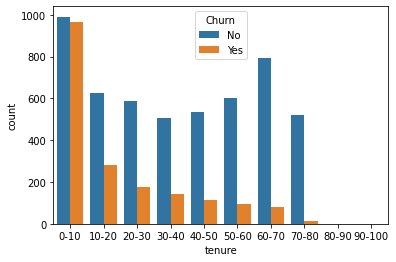

In [ ]:
cd['bin'] = pd.cut(cd['tenure'], bins=range(0,101,10), labels=[f'{l}-{l+10}' for l in range(0,91,10)])
ax=sns.countplot(x='bin', hue='Churn', cd=cd, )
ax.set(xlabel='tenure', ylabel='count')
cd=cd.drop('bin',axis=1)

* Churn seems to occur mostly between 0-10 months

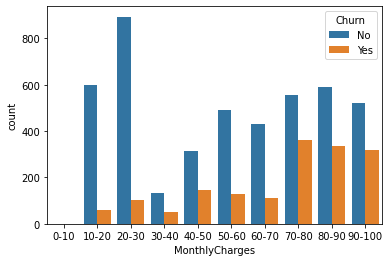

In [ ]:
cd['bin1'] = pd.cut(cd['MonthlyCharges'], bins=range(0,101,10), labels=[f'{l}-{l+10}' for l in range(0,91,10)])
ax=sns.countplot(x='bin1', hue='Churn', cd=cd, )
ax.set(xlabel='MonthlyCharges', ylabel='count')
cd=cd.drop('bin1',axis=1)

* It appears the more people pay monthly the more likely they are to Churn and most Churn occurs at the higher ends

# 5. Preprocessing

## Encoding

In [39]:
ohe = OneHotEncoder(drop='first')

transformer = make_column_transformer((ohe, categorical), remainder='passthrough',
                                      verbose_feature_names_out=False)
encode = transformer.fit_transform(cd)
cd = pd.DataFrame(encode, columns=transformer.get_feature_names_out())
cd

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,FamilyComposition_Family,FamilyComposition_Single,SeniorCitizen,tenure,MonthlyCharges,tenureclass
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,29.85,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,34.0,56.95,6.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,53.85,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,45.0,42.30,7.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,70.70,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,24.0,84.80,4.0
7039,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,72.0,103.20,11.0
7040,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,11.0,29.60,2.0
7041,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,4.0,74.40,1.0


In [40]:
cd=cd.drop(['SeniorCitizen','MultipleLines_No phone service','OnlineSecurity_No internet service','OnlineSecurity_No internet service'],axis=1)  

## Scaling

In [41]:
y=cd['Churn_Yes']

cd=cd.drop('Churn_Yes',axis=1)

numerical=list(cd.select_dtypes(include=['number']).columns)
categorical=list(cd.select_dtypes(include=['object']).columns)

# Standardization
Afer few experiments using the raw numerical features, normalization and standardization and found that the former yelds slightly better results. Altough we are not using gradient based optimization, the features have very distinct ranges and that can be detrimental to the model. I also think that the values are distributed over a long interval as we can see in the plots above, so restricting them to [0, 1] range with normalization is not the best approach.

In [42]:
train_cd=cd

scaler = StandardScaler()
cd[numerical]=scaler.fit_transform(cd[numerical])

train_cd=cd

##  Train and Test Split
In order to test the efficiency of our classifier we need to split the data in a train and test set, so we can evaluate our model in data that it has never seen before.

In [55]:
x_train, x_test, y_train, y_test = train_test_split(
train_cd, y, test_size=0.30, random_state=4, stratify=y)

trainscore=[]

testscore=[]

churnrecall=[]

churnprecision=[]


## Class imbalance
To deal with class imbalance we are going to use **SMOTE** (Synthetic Minority Oversampling Technique ) which is a statistical technique for increasing the number of cases in your dataset in a balanced way.

In [56]:
oversample=SMOTE()
x_train,y_train=oversample.fit_resample(x_train,y_train)

# 6. Model Building 
We are going to build  some supervised models such as:
1. *Logistic Regresion *
 
 Logistic regression is a statistical method that is used for building machine learning models where the dependent variable is dichotomous: i.e. binary. Logistic regression is used to describe data and the relationship between one dependent variable and one or more independent variables.

---
2. *Random Forest*
 
 Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single mode

---
3. *XGBoost Model*

XGBoost (**eXtreme Gradient Boosting**) is a popular supervised-learning algorithm used for regression and classification on large datasets. It uses sequentially-built shallow decision trees to provide accurate results and a highly-scalable training method that avoids overfitting.


In [57]:
model_params = {
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10,100]
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,100],
                'max_features': ['sqrt', 'log2']
        }
    },
    'xgb': {
        'model': xgb.XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42),
        'params' : {
            'n_estimators': [1,5,10,100],
                'max_depth':[1,5,10],
                'learning_rate':[0.01,0.05,0.1,0.5]
        }
    }
}

In [58]:
scores = []
for model_name, mp in model_params.items():
    gcv =  GridSearchCV(mp['model'], mp['params'], cv=10, return_train_score=False)
    gcv_train= gcv.fit(x_train, y_train)
    print(gcv_train.best_params_)
    scores.append({
        'model': model_name,
        'train_score': gcv_train.best_score_,
        'best_params': gcv_train.best_params_,
    })
    
model_attributes = pd.DataFrame(scores,columns=['model','train_score','best_params'])
model_attributes

{'C': 1}
{'max_features': 'sqrt', 'n_estimators': 100}
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


,model,train_score,best_params
0,logistic_regression,0.773750,{'C': 1}
1,random_forest,0.855789,"{'max_features': 'sqrt', 'n_estimators': 100}"
2,xgb,0.854410,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."


In [49]:
# Logistic Regression
test_score=[]
lr_model = LogisticRegression(C=10).fit(x_train, y_train)
test_score.append(lr_model.score(x_test, y_test))

preds_train = lr_model.predict(x_train)
preds_test = lr_model.predict(x_test)


print('LR')
lr_report=classification_report(y_test,preds_test,output_dict=True)
lr_report=pd.DataFrame(lr_report)
churnprecision.append(lr_report.loc['precision']['1.0'])
churnrecall.append(lr_report.loc['recall']['1.0'])


LR


In [50]:
# Random Forest 
rfc_model = RandomForestClassifier(max_features='log2',n_estimators=100).fit(x_train,y_train)
test_score.append(rfc_model.score(x_test, y_test))

preds_train = rfc_model.predict(x_train)
preds_test = rfc_model.predict(x_test)


print('RFC')
rfc_report=classification_report(y_test,preds_test,output_dict=True)
rfc_report=pd.DataFrame(rfc_report)
churnprecision.append(rfc_report.loc['precision']['1.0'])
churnrecall.append(rfc_report.loc['recall']['1.0'])


RFC


In [51]:
# XGBoost 
xgb_model=xgb.XGBClassifier(n_estimators = 100,max_depths=10,learning_rate=0.05,objective='binary:logistic',n_jobs=-1).fit(x_train, y_train)
test_score.append(xgb_model.score(x_test, y_test))

preds_train = xgb_model.predict(x_train)
preds_test = xgb_model.predict(x_test)

print('XGB')
xgb_report=classification_report(y_test,preds_test,output_dict=True)
xgb_report=pd.DataFrame(xgb_report)
churnprecision.append(xgb_report.loc['precision']['1.0'])
churnrecall.append(xgb_report.loc['recall']['1.0'])

model_attributes['test_score']=test_score
model_attributes['churnprecision']=churnprecision
model_attributes['churnrecall']=churnrecall


XGB


# 7. Scoring

In [52]:
model_attributes

,model,train_score,best_params,test_score,churnprecision,churnrecall
0,logistic_regression,0.765603,{'C': 1},0.753904,0.524376,0.786096
1,random_forest,0.858133,"{'max_features': 'sqrt', 'n_estimators': 100}",0.778987,0.589354,0.552585
2,xgb,0.854684,"{'learning_rate': 0.05, 'max_depth': 10, 'n_es...",0.775674,0.558546,0.739750


## 8. Plotting the ROC Curve

An ROC curve demonstrates several things:

* It shows the tradeoff between sensitivity and specificity (any increase in
sensitivity will be accompanied by a decrease in specificity).
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [60]:
roc_auc_score(y_test ,preds_test) 

0.7642051197236157

In [61]:
pred_prob = lr_model.predict_proba(x_test)

In [62]:
fpr , tpr , ther = roc_curve(y_test , pred_prob[:, 1])

Text(0.5, 0.5, 'Auroc is 0.7642')

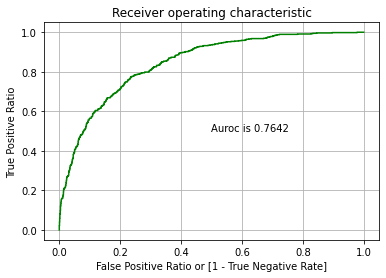

In [67]:
plt.plot(fpr , tpr , color = "g")
plt.xlabel("False Positive Ratio or [1 - True Negative Rate]")
plt.ylabel("True Positive Ratio")
plt.title("Receiver operating characteristic")
plt.grid()
plt.text(x = .5 ,y =.5 , s = "Auroc is 0.7642")

# Conclusion
As we are more focused on who cancels their subscriptions. We placed more importance on the Recall compared to the Precision. This is because a false negative which is means they are still on subscription is more costly than a false positve which is that they have churned. 

With the former if we find that a person has churned but the mdoel precdicted that they did not we lose money but with the latter if we predicted that they had churned but they did not we do not lose as much as in the former case.

Given this I believe the XGB model performs the best despite the underfitting.


## Thank You 